# 1) Importing Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# 2) Loading Dataset

In [2]:
bank_data = pd.read_csv('bank-additional-full.csv', sep = ';')
bank_data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [3]:
bank_data.shape

(41188, 21)

In [4]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
print(bank_data['job'].unique())
print(bank_data['marital'].unique())
print(bank_data['education'].unique())
print(bank_data['default'].unique())
print(bank_data['month'].unique())
print(bank_data['day_of_week'].unique())
print(bank_data['contact'].unique())
print(bank_data['housing'].unique())
print(bank_data['loan'].unique())
print(bank_data['poutcome'].unique())
print(bank_data['previous'].unique())
print(bank_data['pdays'].unique())
print(bank_data['y'].unique())

['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
['married' 'single' 'divorced' 'unknown']
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
['no' 'unknown' 'yes']
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
['mon' 'tue' 'wed' 'thu' 'fri']
['telephone' 'cellular']
['no' 'yes' 'unknown']
['no' 'yes' 'unknown']
['nonexistent' 'failure' 'success']
[0 1 2 3 4 5 6 7]
[999   6   4   3   5   1   0  10   7   8   9  11   2  12  13  14  15  16
  21  17  18  22  25  26  19  27  20]
['no' 'yes']


# 3) Preprocessing of Dataset

In [6]:
bank_data.rename(columns = {'default':'Default Credit', 'housing': 'Housing Loan', 'loan': 'Personal Loan', 'contact':'Mode of Contact',
                            'month':'Contact Month', 'day_of_week':'Contact Day', 'duration':'Contact Duration','pdays':'Passed_Days',
                           ' previous':'Performed_Contacts', 'poutcome':'Outcome_of_Campaign','nr.employed':'No._Of_Employees','y':'Term Deposit'}, inplace=True)
bank_data.head(10)

,age,job,marital,education,Default Credit,Housing Loan,Personal Loan,Mode of Contact,Contact Month,Contact Day,...,campaign,Passed_Days,previous,Outcome_of_Campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,No._Of_Employees,Term Deposit
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [7]:
bank_data.replace({'unknown': 'NaN'}, inplace=True)
bank_data.replace(['nonexistent', 'failure', 'success'], [0, 1, 2], inplace=True)
bank_data.replace(['mar','apr','may','jun','jul','aug','sep','oct','nov','dec'], [3, 4, 5, 6, 7, 8, 9, 10, 11, 12], inplace=True)
bank_data.replace(['married', 'single', 'divorced','unknown'], [2, 1, 3, 0], inplace=True)
bank_data

,age,job,marital,education,Default Credit,Housing Loan,Personal Loan,Mode of Contact,Contact Month,Contact Day,...,campaign,Passed_Days,previous,Outcome_of_Campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,No._Of_Employees,Term Deposit
0,56,housemaid,2,basic.4y,no,no,no,telephone,5,mon,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,2,high.school,NaN,no,no,telephone,5,mon,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,2,high.school,no,yes,no,telephone,5,mon,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,2,basic.6y,no,no,no,telephone,5,mon,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,2,high.school,no,no,yes,telephone,5,mon,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,2,professional.course,no,yes,no,cellular,11,fri,...,1,999,0,0,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,2,professional.course,no,no,no,cellular,11,fri,...,1,999,0,0,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,2,university.degree,no,yes,no,cellular,11,fri,...,2,999,0,0,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,2,professional.course,no,no,no,cellular,11,fri,...,1,999,0,0,-1.1,94.767,-50.8,1.028,4963.6,yes


In [8]:
bank_data.replace({'basic.4y':'Basic+4yr', 'high.school':'High_School', 'basic.6y':'Basic+6yr', 'basic.9y':'Basic+9yr',
                   'professional.course':'Professional Course','university.degree':'University Degree','illiterate': 'Illiterate'}, inplace=True)
bank_data

,age,job,marital,education,Default Credit,Housing Loan,Personal Loan,Mode of Contact,Contact Month,Contact Day,...,campaign,Passed_Days,previous,Outcome_of_Campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,No._Of_Employees,Term Deposit
0,56,housemaid,2,Basic+4yr,no,no,no,telephone,5,mon,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,2,High_School,NaN,no,no,telephone,5,mon,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,2,High_School,no,yes,no,telephone,5,mon,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,2,Basic+6yr,no,no,no,telephone,5,mon,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,2,High_School,no,no,yes,telephone,5,mon,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,2,Professional Course,no,yes,no,cellular,11,fri,...,1,999,0,0,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,2,Professional Course,no,no,no,cellular,11,fri,...,1,999,0,0,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,2,University Degree,no,yes,no,cellular,11,fri,...,2,999,0,0,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,2,Professional Course,no,no,no,cellular,11,fri,...,1,999,0,0,-1.1,94.767,-50.8,1.028,4963.6,yes


In [9]:
bank_data_df = pd.DataFrame(bank_data)

# 4) Visualization

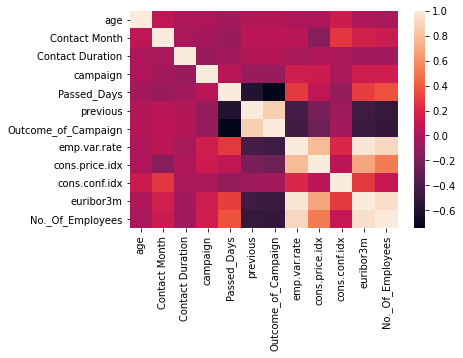

In [10]:
sns.heatmap(bank_data.corr())

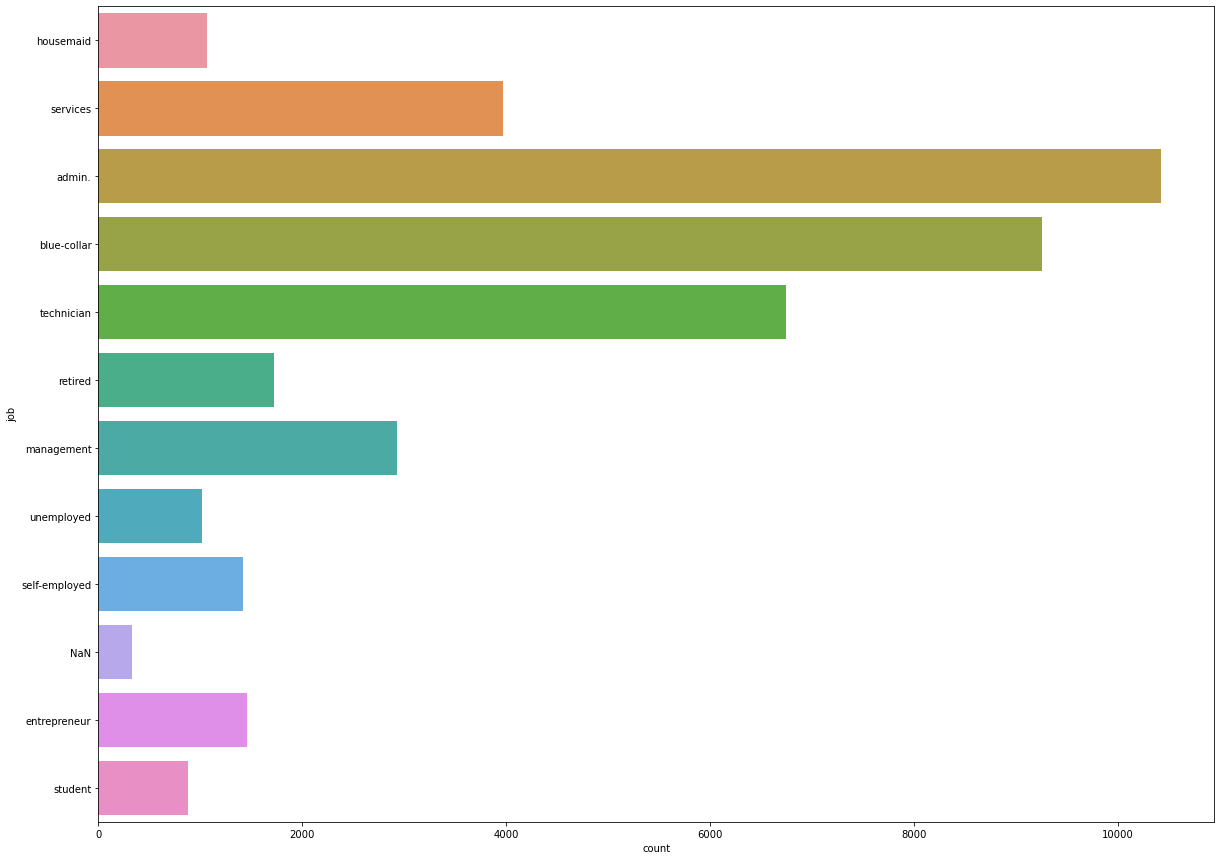

In [11]:
plt.figure(figsize=(20,15))
sns.countplot(y='job', data=bank_data_df)

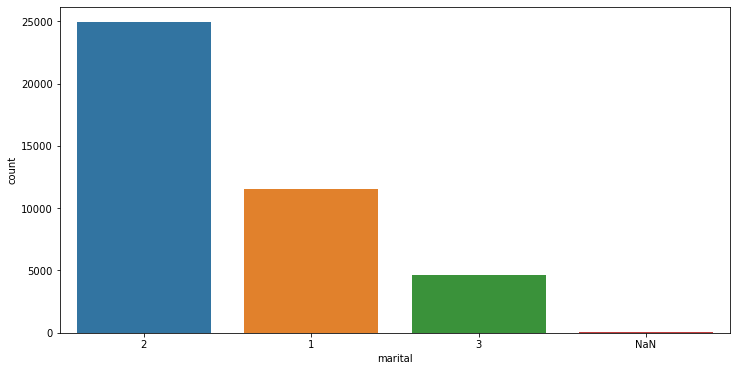

In [12]:
plt.figure(figsize=(12,6))
sns.countplot('marital', data=bank_data)

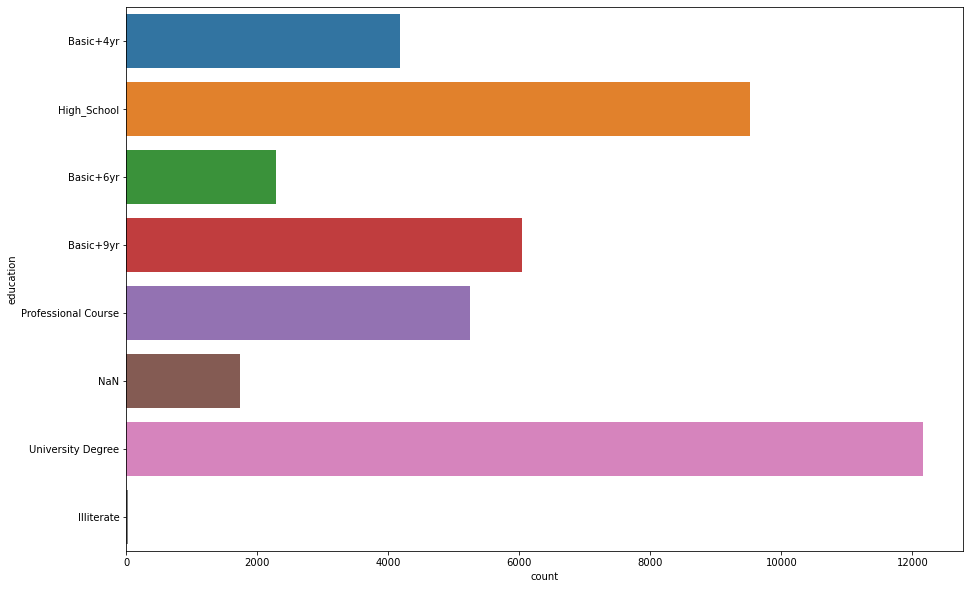

In [13]:
plt.figure(figsize=(15,10))
sns.countplot(y='education', data=bank_data)

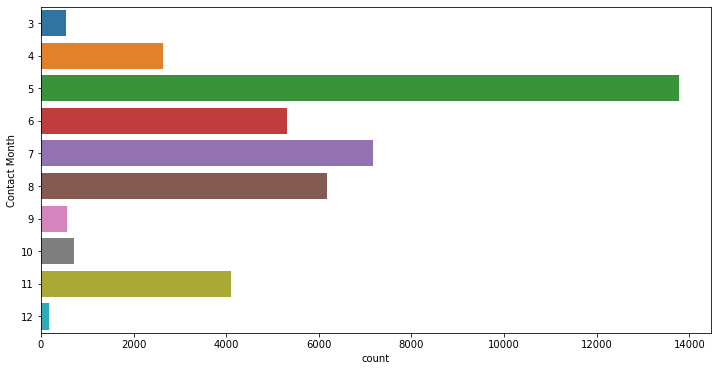

In [14]:
plt.figure(figsize=(12,6))
sns.countplot(y='Contact Month', data=bank_data)

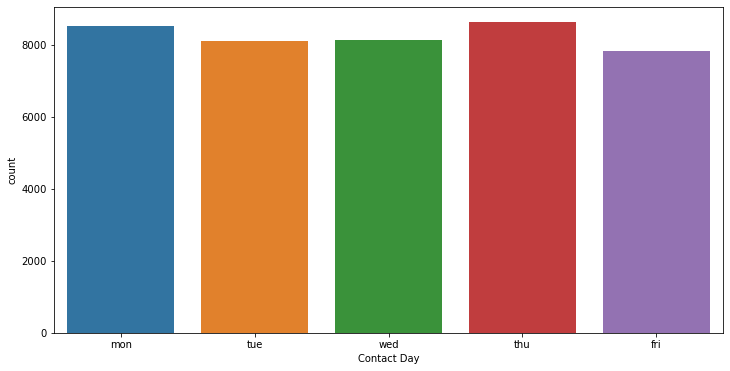

In [15]:
plt.figure(figsize=(12,6))
sns.countplot('Contact Day', data=bank_data)

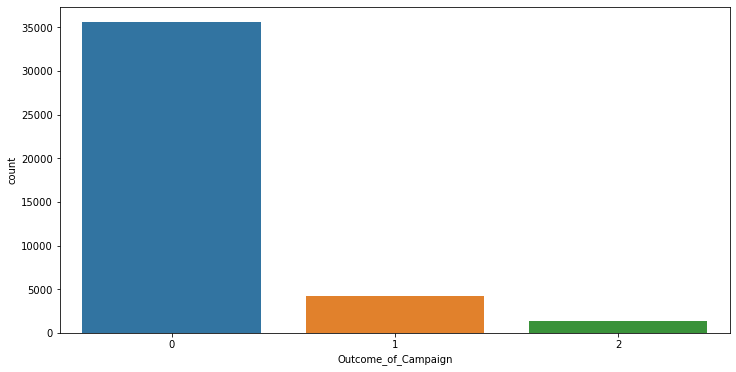

In [16]:
plt.figure(figsize=(12,6))
sns.countplot('Outcome_of_Campaign', data=bank_data)

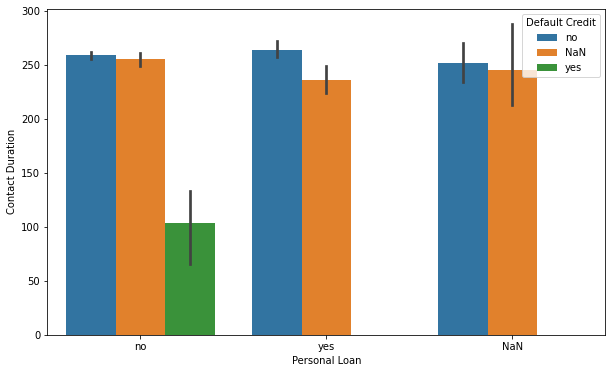

In [17]:
plt.figure(figsize=(10,6))
sns.barplot('Personal Loan', 'Contact Duration', hue='Default Credit', data=bank_data)

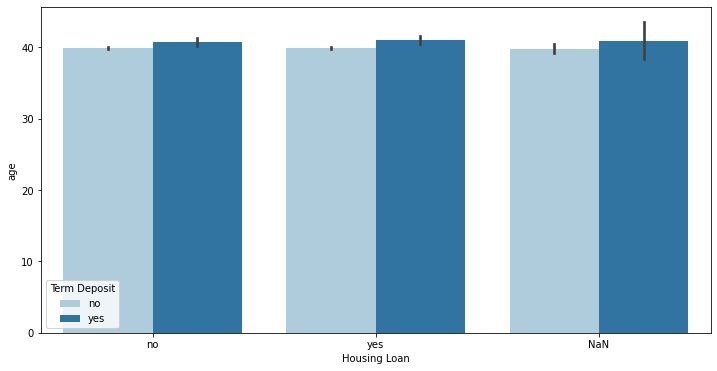

In [18]:
plt.figure(figsize=(12,6))
sns.barplot('Housing Loan', 'age', hue='Term Deposit', palette="Paired", data=bank_data)

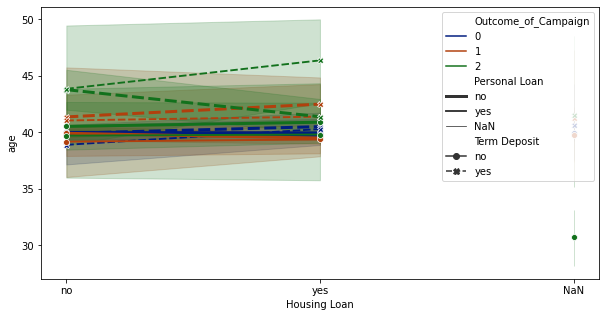

In [19]:
plt.figure(figsize=(10, 5))
sns.lineplot('Housing Loan', 'age', hue='Outcome_of_Campaign', size='Personal Loan', style='Term Deposit', data=bank_data_df, palette="dark", markers=True )

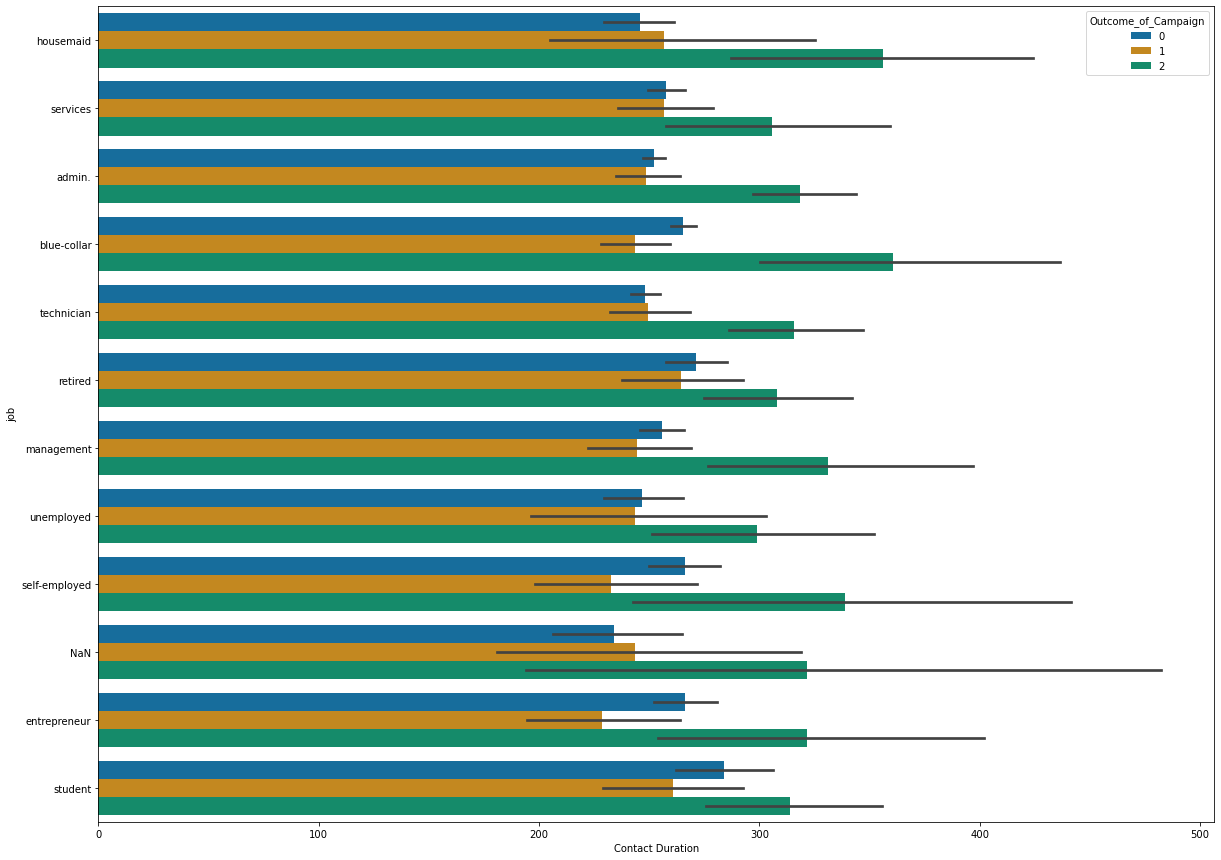

In [20]:
plt.figure(figsize=(20,15))
sns.barplot('Contact Duration', 'job', hue='Outcome_of_Campaign', palette="colorblind", data=bank_data)

# 5) Converting to Numeric 

In [21]:
job = bank_data_df['job'].values
marital = bank_data_df['marital'].values
edu = bank_data_df['education'].values
default = bank_data['Default Credit'].values
house_loan = bank_data['Housing Loan'].values
personal_loan = bank_data['Personal Loan'].values
term_deposit = bank_data['Term Deposit'].values

In [22]:
bank_data_df.drop(['Mode of Contact','emp.var.rate','euribor3m','cons.price.idx','cons.conf.idx'], axis=1, inplace=True)

In [23]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder=LabelEncoder()
default = labelencoder.fit_transform(bank_data_df['Default Credit'])
job = labelencoder.fit_transform(bank_data_df['job'])
edu = labelencoder.fit_transform(bank_data_df['education'])
house_loan = labelencoder.fit_transform(bank_data_df['Housing Loan'])
personal_loan = labelencoder.fit_transform(bank_data_df['Personal Loan'])
term_deposit = labelencoder.fit_transform(bank_data_df['Term Deposit'])
onehotencoder=OneHotEncoder()

In [24]:
print(default)
print(job)
print(edu)
print(house_loan)
print(personal_loan)
print(term_deposit)

[1 0 1 ... 1 1 1]
[ 4  8  8 ...  6 10  6]
[0 3 3 ... 7 6 6]
[1 1 2 ... 2 1 2]
[1 1 1 ... 1 1 1]
[0 0 0 ... 0 1 0]


In [25]:
bank_data_df['Default Credit'] = default
bank_data_df['job'] = job
bank_data_df['education'] = edu
bank_data_df['Housing Loan'] = house_loan 
bank_data_df['Personal Loan'] = personal_loan
bank_data_df['Term Deposit'] = term_deposit

In [26]:
bank_data_df.head(15)

,age,job,marital,education,Default Credit,Housing Loan,Personal Loan,Contact Month,Contact Day,Contact Duration,campaign,Passed_Days,previous,Outcome_of_Campaign,No._Of_Employees,Term Deposit
0,56,4,2,0,1,1,1,5,mon,261,1,999,0,0,5191.0,0
1,57,8,2,3,0,1,1,5,mon,149,1,999,0,0,5191.0,0
2,37,8,2,3,1,2,1,5,mon,226,1,999,0,0,5191.0,0
3,40,1,2,1,1,1,1,5,mon,151,1,999,0,0,5191.0,0
4,56,8,2,3,1,1,2,5,mon,307,1,999,0,0,5191.0,0
5,45,8,2,2,0,1,1,5,mon,198,1,999,0,0,5191.0,0
6,59,1,2,6,1,1,1,5,mon,139,1,999,0,0,5191.0,0
7,41,2,2,5,0,1,1,5,mon,217,1,999,0,0,5191.0,0
8,24,10,1,6,1,2,1,5,mon,380,1,999,0,0,5191.0,0
9,25,8,1,3,1,2,1,5,mon,50,1,999,0,0,5191.0,0


In [27]:
bank_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  41188 non-null  int64  
 1   job                  41188 non-null  int32  
 2   marital              41188 non-null  object 
 3   education            41188 non-null  int32  
 4   Default Credit       41188 non-null  int32  
 5   Housing Loan         41188 non-null  int32  
 6   Personal Loan        41188 non-null  int32  
 7   Contact Month        41188 non-null  int64  
 8   Contact Day          41188 non-null  object 
 9   Contact Duration     41188 non-null  int64  
 10  campaign             41188 non-null  int64  
 11  Passed_Days          41188 non-null  int64  
 12  previous             41188 non-null  int64  
 13  Outcome_of_Campaign  41188 non-null  int64  
 14  No._Of_Employees     41188 non-null  float64
 15  Term Deposit         41188 non-null 

In [28]:
duration = bank_data_df.sort_values(by='Contact Duration', ascending=True, inplace=True)
bank_data_df.groupby(['age','job','Default Credit', 'marital', 'Housing Loan','Personal Loan','Contact Month','Contact Duration','Passed_Days','campaign','Outcome_of_Campaign','No._Of_Employees','Term Deposit']).age.count()
bank_data_df

,age,job,marital,education,Default Credit,Housing Loan,Personal Loan,Contact Month,Contact Day,Contact Duration,campaign,Passed_Days,previous,Outcome_of_Campaign,No._Of_Employees,Term Deposit
33015,31,2,2,2,1,1,1,5,mon,0,2,999,0,0,5099.1,0
23031,59,5,2,7,1,2,1,8,tue,0,10,999,0,0,5228.1,0
28063,53,2,3,3,1,2,1,4,fri,0,3,999,0,0,5099.1,0
6251,39,1,2,3,1,2,1,5,tue,0,4,999,0,0,5191.0,0
28239,44,2,2,2,1,1,1,4,tue,1,1,999,0,0,5099.1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7727,37,11,2,6,1,2,1,5,fri,3631,2,999,0,0,5191.0,1
13820,31,10,2,6,1,1,1,7,thu,3643,1,999,0,0,5228.1,1
40537,27,1,1,3,1,1,1,8,fri,3785,1,999,0,0,4991.6,0
22192,52,2,2,0,1,1,1,8,thu,4199,3,999,0,0,5228.1,1


In [29]:
bank_data_df.replace({'NaN': 0}, inplace=True)
bank_data_df.drop(['Contact Day'], axis=1, inplace=True)

In [30]:
bank_data_df['No._Of_Employees'] = bank_data_df['No._Of_Employees'].astype(int)
bank_data_df['Outcome_of_Campaign']= pd.to_numeric(bank_data_df['Outcome_of_Campaign'], errors='coerce')

In [31]:
bank_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41188 entries, 33015 to 24091
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  41188 non-null  int64
 1   job                  41188 non-null  int32
 2   marital              41188 non-null  int64
 3   education            41188 non-null  int32
 4   Default Credit       41188 non-null  int32
 5   Housing Loan         41188 non-null  int32
 6   Personal Loan        41188 non-null  int32
 7   Contact Month        41188 non-null  int64
 8   Contact Duration     41188 non-null  int64
 9   campaign             41188 non-null  int64
 10  Passed_Days          41188 non-null  int64
 11  previous             41188 non-null  int64
 12  Outcome_of_Campaign  41188 non-null  int64
 13  No._Of_Employees     41188 non-null  int32
 14  Term Deposit         41188 non-null  int32
dtypes: int32(7), int64(8)
memory usage: 3.9 MB


In [32]:
bank_data_df.describe()

,age,job,marital,education,Default Credit,Housing Loan,Personal Loan,Contact Month,Contact Duration,campaign,Passed_Days,previous,Outcome_of_Campaign,No._Of_Employees,Term Deposit
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,4.628435,1.827231,4.085850,0.791347,1.499806,1.127659,6.607896,258.285010,2.567593,962.475454,0.172963,0.169904,5166.849446,0.112654
std,10.42125,3.558984,0.608902,2.478697,0.406530,0.545967,0.399297,2.040998,259.279249,2.770014,186.910907,0.494901,0.455754,72.328375,0.316173
min,17.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,1.000000,0.000000,0.000000,0.000000,4963.000000,0.000000
25%,32.00000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,5.000000,102.000000,1.000000,999.000000,0.000000,0.000000,5099.000000,0.000000
50%,38.00000,3.000000,2.000000,3.000000,1.000000,2.000000,1.000000,6.000000,180.000000,2.000000,999.000000,0.000000,0.000000,5191.000000,0.000000
75%,47.00000,8.000000,2.000000,7.000000,1.000000,2.000000,1.000000,8.000000,319.000000,3.000000,999.000000,0.000000,0.000000,5228.000000,0.000000
max,98.00000,11.000000,3.000000,7.000000,2.000000,2.000000,2.000000,12.000000,4918.000000,56.000000,999.000000,7.000000,2.000000,5228.000000,1.000000


# 6) Data Spliting

In [33]:
x = bank_data_df.drop(['Term Deposit'], axis=1)
y = bank_data_df['Term Deposit'].values

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=32)

# 7)  Model Training and prediction

In [49]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(criterion="entropy", max_depth=3)
DT = DT.fit(X_train, y_train)

In [50]:
pred = DT.predict(X_test)
pred

array([0, 0, 1, ..., 0, 0, 1])

In [37]:
DT.predict_proba(X_test) 

array([[0.83767535, 0.16232465],
       [0.98961028, 0.01038972],
       [0.17089453, 0.82910547],
       ...,
       [0.79136691, 0.20863309],
       [0.79136691, 0.20863309],
       [0.98961028, 0.01038972]])

In [38]:
print("Predicticed Subscription for term deposit: ", pred)  

Predicticed Subscription for term deposit:  [0 0 1 ... 0 0 0]


In [39]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, pred))

Accuracy: 0.8994983006959055


# 8) Visualizing Result

[Text(558.0, 713.475, 'X[13] <= 5087.5\nentropy = 0.509\nsamples = 35009\nvalue = [31048, 3961]'),
 Text(279.0, 509.625, 'X[8] <= 158.5\nentropy = 0.993\nsamples = 4235\nvalue = [2333, 1902]'),
 Text(139.5, 305.775, 'X[8] <= 80.5\nentropy = 0.602\nsamples = 1435\nvalue = [1224, 211]'),
 Text(69.75, 101.92499999999995, 'entropy = 0.177\nsamples = 377\nvalue = [367, 10]'),
 Text(209.25, 101.92499999999995, 'entropy = 0.701\nsamples = 1058\nvalue = [857, 201]'),
 Text(418.5, 305.775, 'X[12] <= 1.5\nentropy = 0.969\nsamples = 2800\nvalue = [1109, 1691]'),
 Text(348.75, 101.92499999999995, 'entropy = 0.999\nsamples = 2051\nvalue = [981, 1070]'),
 Text(488.25, 101.92499999999995, 'entropy = 0.66\nsamples = 749\nvalue = [128, 621]'),
 Text(837.0, 509.625, 'X[8] <= 472.5\nentropy = 0.354\nsamples = 30774\nvalue = [28715, 2059]'),
 Text(697.5, 305.775, 'X[7] <= 4.5\nentropy = 0.151\nsamples = 26732\nvalue = [26151, 581]'),
 Text(627.75, 101.92499999999995, 'entropy = 0.64\nsamples = 1996\nvalue

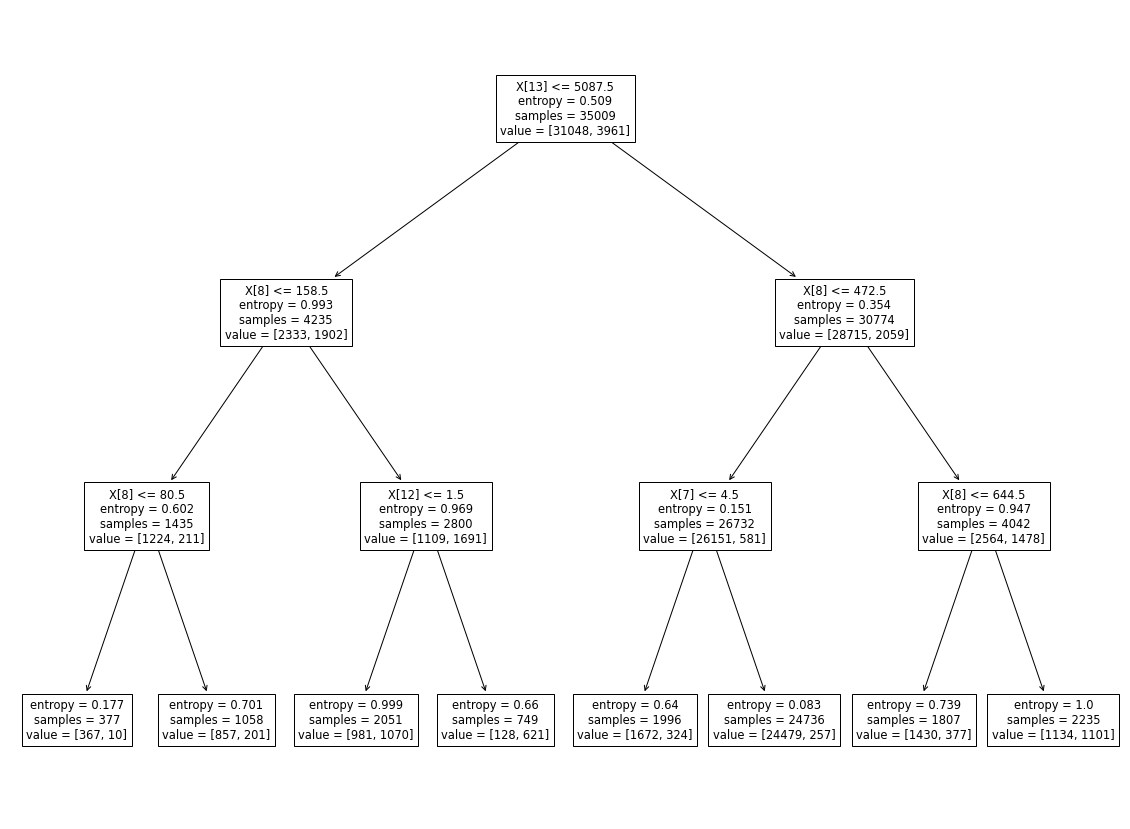

In [40]:
from sklearn import tree
plt.figure(figsize=(20,15))
tree.plot_tree(DT) 

In [41]:
# scores = cross_val_score(estimator=DT, X=x, y=y, cv=7)
# print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

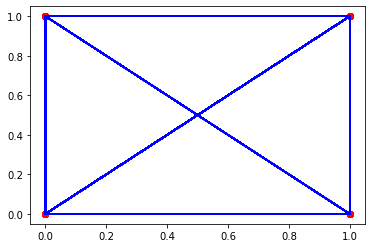

In [42]:
plt.scatter(y_test, pred, color = 'red')
plt.plot(y_test, pred, color = 'blue')

Text(0.5, 1.0, "('Accuracy Score: ', 0.8994983006959055)")

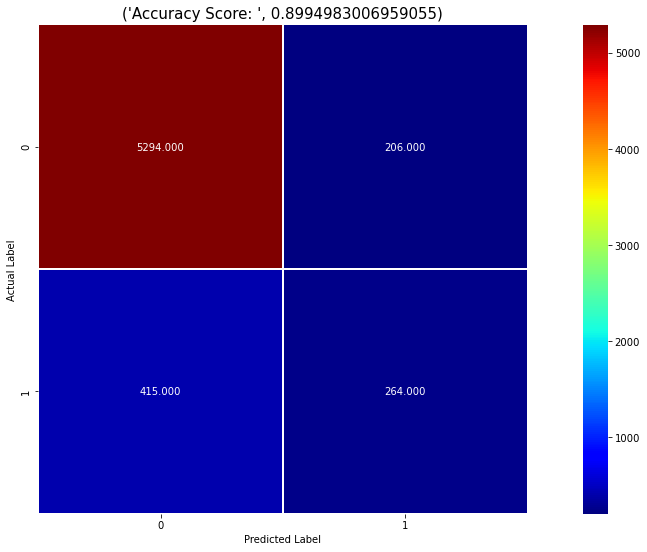

In [47]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, pred)
# print(cm)
plt.figure(figsize=(20,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='jet')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
all_sample_title=f"Accuracy Score: ",metrics.accuracy_score(y_test, pred)
plt.title(all_sample_title, size=15)